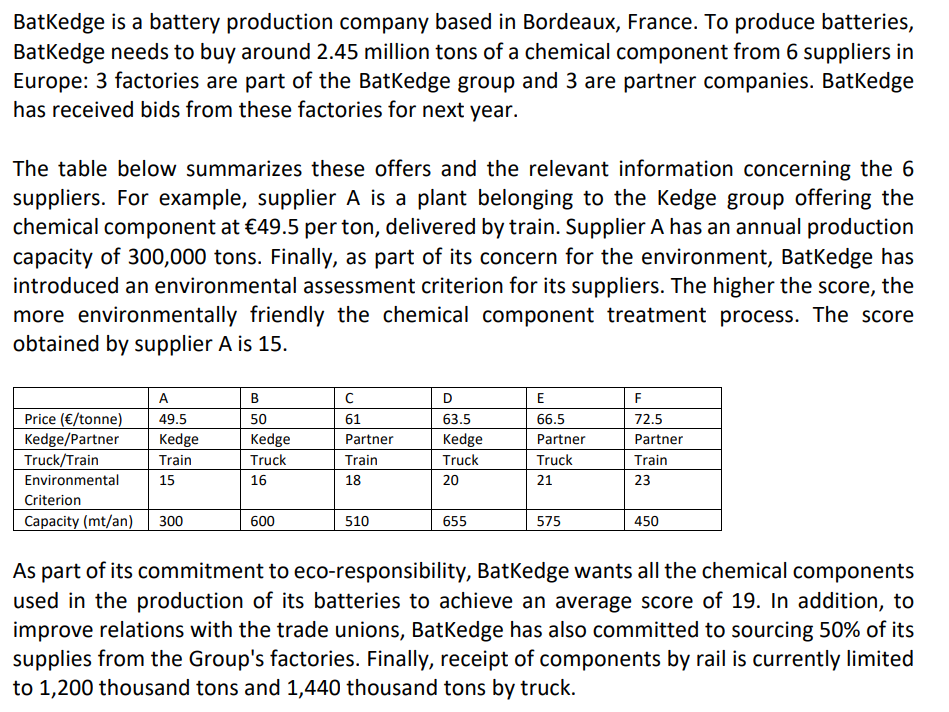

### Make it with normal formulation

In [2]:
from scipy.optimize import linprog

# Coefficients of the objective function (minimize cost)
c = [49.5, 50, 61, 63.5, 66.5, 72.5]

# Coefficients for the inequality constraints (Ax <= b)
A = [
    [1, 1, 1, 1, 1, 1],  # Total amount constraint
    [-1, 0, 0, 0, 0, 0],  # Capacity constraints for each supplier
    [0, -1, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0],
    [0, 0, 0, -1, 0, 0],
    [0, 0, 0, 0, -1, 0],
    [0, 0, 0, 0, 0, -1],
    [1, 1, 0, 1, 0, 0],  # 50% supplies from the group's factories
    [1, 0, 1, 0, 0, 1],  # Rail transport capacity
    [0, 1, 0, 1, 1, 0]   # Truck transport capacity
]

b = [2450000, -300000, -600000, -510000, -655000, -575000, -450000, 1225000, 1200000, 1440000]

# Coefficients for the equality constraints (Ax = b)
A_eq = [[15, 16, 18, 20, 21, 23]]  # Environmental score constraint
b_eq = [19 * 2450000]  # Average environmental score must be at least 19

# Bounds for each variable (x >= 0)
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
x4_bounds = (0, None)
x5_bounds = (0, None)
bounds = [x0_bounds, x1_bounds, x2_bounds, x3_bounds, x4_bounds, x5_bounds]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

result_x = result.x if result.success else None
result.fun if result.success else None, result_x, result.message
result

       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 0
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None

In [12]:
from scipy.optimize import linprog

# Coefficients of the objective function (minimize cost)
c = [49.5, 50, 61, 63.5, 66.5, 72.5]

# Coefficients for the inequality constraints (Ax <= b)
A_ub = [
    [1, 1, 1, 1, 1, 1],  # Total amount constraint
    [-1, 0, 0, 0, 0, 0],  # Capacity constraints for each supplier
    [0, -1, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0],
    [0, 0, 0, -1, 0, 0],
    [0, 0, 0, 0, -1, 0],
    [0, 0, 0, 0, 0, -1],
    [-1, -1, 0, -1, 0, 0],  # 50% supplies from the group's factories
    [-1, 0, -1, 0, 0, -1],  # Rail transport capacity
    [0, -1, 0, -1, -1, 0]   # Truck transport capacity
]

b_ub = [2450000, -300000, -600000, -510000, -655000, -575000, -450000, -1225000, -1200000, -1440000]

# Coefficients for the equality constraints (Ax = b)
A_eq = [
    [15, 16, 18, 20, 21, 23]  # Environmental score constraint
]
b_eq = [19 * 2450000]  # Average environmental score must be at least 19

# Bounds for each variable (x >= 0)
bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]

# Solve the linear programming problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

if result.success:
    print('Optimal value:', result.fun)
    print('Optimal variables:', result.x)
else:
    print('Optimization was unsuccessful &#8203;``【oaicite:0】``&#8203')


Optimization was unsuccessful &#8203;``【oaicite:0】``&#8203


### Make it with another aproach

In [9]:
from scipy.optimize import linprog
import numpy as np

# Coefficients of the objective function (minimize cost)
c = [49.5, 50, 61, 63.5, 66.5, 72.5]

# The company needs a total of 2.45 million tons, so we need to adjust this number to the correct scale for the constraints
total_amount_required = 2.45e6  # 2.45 million tons
kedge_requirement = total_amount_required * 0.5  # 50% of total from Kedge's factories
environmental_score_target = 19  # Average environmental score must be at least 19

# Coefficients for the inequality constraints (Ax <= b)
# Note: the transportation and capacity constraints need to be specified as upper bounds, not lower bounds
A_ub = [
    [1, 1, 1, 1, 1, 1],  # Total amount of chemical component required
    [-1, 0, 0, 0, 0, 0],  # Capacity constraints for each supplier
    [0, -1, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0],
    [0, 0, 0, -1, 0, 0],
    [0, 0, 0, 0, -1, 0],
    [0, 0, 0, 0, 0, -1],
    [1, 1, 0, 1, 0, 0],  # At least 50% supplies from Kedge's factories
    [-1, 0, -1, 0, 0, -1],  # Transport capacity by rail
    [0, -1, 0, -1, -1, 0],  # Transport capacity by truck
    # Environmental score constraint (sum of products divided by total amount >= target score)
    [15 - environmental_score_target, 16 - environmental_score_target, 
     18 - environmental_score_target, 20 - environmental_score_target, 
     21 - environmental_score_target, 23 - environmental_score_target]
]

b_ub = [
    total_amount_required,  # Total amount of chemical component required
    300000,  # Capacity of supplier A
    600000,  # Capacity of supplier B
    510000,  # Capacity of supplier C
    655000,  # Capacity of supplier D
    575000,  # Capacity of supplier E
    450000,  # Capacity of supplier F
    kedge_requirement,  # At least 50% supplies from Kedge's factories
    1200000,  # Transport capacity by rail
    1440000,  # Transport capacity by truck
    0  # Environmental score must be at least the target score
]

# There are no equality constraints in this problem, so we set them to None
A_eq = None
b_eq = None

# Bounds for each variable (x >= 0)
bounds = [(0, None) for _ in range(len(c))]

# Solve the linear programming problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Output the result
if result.success:
    optimal_value = result.fun
    optimal_variables = result.x
    message = result.message
else:
    optimal_value = None
    optimal_variables = None
    message = result.message

optimal_value, optimal_variables, message



(0.0,
 array([0., 0., 0., 0., 0., 0.]),
 'Optimization terminated successfully. (HiGHS Status 7: Optimal)')

In [11]:
result.x

array([0., 0., 0., 0., 0., 0.])

### Make it in two faces

In [15]:
from scipy.optimize import linprog

# Coefficients of the objective function (minimize cost)
c = [49.5, 50, 61, 63.5, 66.5, 72.5]

# Coefficients for the inequality constraints (Ax <= b)
# Removed the 50% supplies from the group's factories, rail transport, and truck transport constraints to refactor them.
A = [
    [1, 1, 1, 1, 1, 1],  # Total amount constraint
    [-1, 0, 0, 0, 0, 0],  # Capacity constraints for each supplier
    [0, -1, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0],
    [0, 0, 0, -1, 0, 0],
    [0, 0, 0, 0, -1, 0],
    [0, 0, 0, 0, 0, -1]
]

# Upper bounds for the total amount and capacities
b = [
    2450000,   # Total amount of chemical component needed
    -300000,   # Supplier A capacity
    -600000,   # Supplier B capacity
    -510000,   # Supplier C capacity
    -655000,   # Supplier D capacity
    -575000,   # Supplier E capacity
    -450000    # Supplier F capacity
]

# Coefficients for the equality constraints (Ax = b)
# Environmental score constraint
A_eq = [
    [15, 16, 18, 20, 21, 23],  # Environmental scores for suppliers
    [1, 1, 0, 1, 0, 0],        # 50% supplies from the group's factories
    [1, 0, 1, 0, 0, 1],        # Rail transport capacity
    [0, 1, 0, 1, 1, 0]         # Truck transport capacity
]

# Right-hand side of the equality constraints
b_eq = [
    19 * 2450000,  # Average environmental score must be at least 19
    0.5 * 2450000, # At least 50% of supplies must come from the group's factories
    1200000,       # Rail transport is limited to 1,200 thousand tons
    1440000        # Truck transport is limited to 1,440 thousand tons
]

# Bounds for each variable (x >= 0)
bounds = [(0, None)] * 6  # All suppliers can supply between 0 and their capacity

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
result_x = result.x if result.success else None
result


       message: The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)
       success: False
        status: 2
           fun: None
             x: None
           nit: 0
         lower:  residual: None
                marginals: None
         upper:  residual: None
                marginals: None
         eqlin:  residual: None
                marginals: None
       ineqlin:  residual: None
                marginals: None